<a href="https://colab.research.google.com/github/sbanerjee2020/cryptobot/blob/master/SMA_EMA_MACD_RSI_BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Technical Indicators
- SMA
- EMA
- MACD
- RSI
- Bollinger Bands

Python implementation of a few technical indicators used during trading.

# SMA Computation

#### Original Post  - https://towardsdatascience.com/implementing-moving-averages-in-python-1ad28e636f9d

In [0]:
#!pip install pyEX


**Simple Moving Average** is arithmetic mean over the number of periods.

![Simple Moving Average](https://cdn-images-1.medium.com/max/1600/1*sTy16YVV5JSyuYk7gYLsbQ.png)

Traders and market participants will cite the **10, 20, 50, 100, or 200** day moving averages.

![Exponential Moving Average](https://cdn-images-1.medium.com/max/1600/1*IF5pSc_Zp_vlKI3paux4-Q.png)



Example of using moving averages is following crossovers. 
- **Bullish crossover** occurs when the short-term EMA crosses above the long-term EMA. 
- **Bearish crossover** occurs when the short-term EMA crosses below the long-term EMA.

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pyEX as p

In [0]:
ticker = 'TSLA'
timeframe = '1y'

In [0]:

df = p.chartDF(ticker, timeframe)
df = df[['close']]
df.reset_index(level=0, inplace=True)

In [17]:
df

,date,close
0,2018-04-30,293.90
1,2018-05-01,299.92
2,2018-05-02,301.15
3,2018-05-03,284.45
4,2018-05-04,294.09
5,2018-05-07,302.77
6,2018-05-08,301.97
7,2018-05-09,306.85
8,2018-05-10,305.02
9,2018-05-11,301.06


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


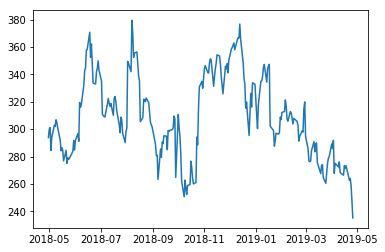

In [18]:

df.columns=['ds','y']

plt.plot(df.ds, df.y)
plt.show()

In [0]:


####
sma_20 = df.y.rolling(window=20).mean()
sma_50 = df.y.rolling(window=50).mean()

ema_20 = df.y.ewm(span=20, adjust=False).mean()
ema_50 = df.y.ewm(span=50, adjust=False).mean()

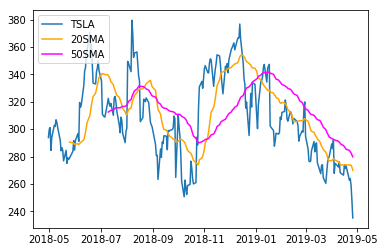

In [20]:
plt.plot(df.ds, df.y, label='TSLA')

plt.plot(df.ds, sma_20, label='20SMA', color='orange')
plt.plot(df.ds, sma_50, label='50SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

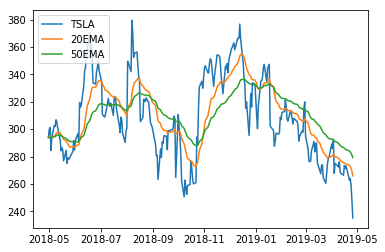

In [21]:
plt.plot(df.ds, df.y, label='TSLA')
plt.plot(df.ds, ema_20, label='20EMA')
plt.plot(df.ds, ema_50, label='50EMA')
plt.legend(loc='upper left')
plt.show()

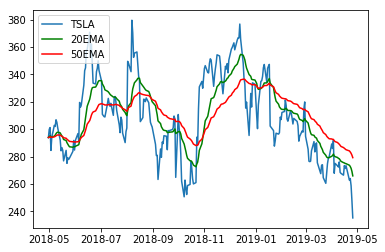

In [22]:
plt.plot(df.ds, df.y, label='TSLA')
plt.plot(df.ds, ema_20, label='20EMA', color='green')
plt.plot(df.ds, ema_50, label='50EMA', color='red')
plt.legend(loc='upper left')
plt.show()

Basics of **MACD**
Moving Average Convergence Divergence (MACD) is a trend following indicator. MACD can be calculated very simply by subtracting the **26 period EMA** from the **12 period EMA**.

# Original Post
https://towardsdatascience.com/implementing-macd-in-python-cc9b2280126a

# Strategies

- **MACD** is commonly used by analyzing **crossovers**, divergences, and periods of steep slope (positive or negative). 

- MACD and a signal line (a 9 day EMA of the MACD).

- **Bullish crossover**: MACD crosses above the signal line ==>  **BUY**

- **Bearish crossover**:  MACD crosses below the signal line ==> **SELL**

- If a crossover occurs with a high sloping MACD, this can be a sign of an overbought or oversold condition, depending on if the crossover is bullish or bearish respectively. 

- MACD is a great indicator for understanding if movement in the price is strong or weak. A weak movement is likely to correct and a strong movement is likely to continue.

- **Divergences** are also simple to understand. When the MACD establishes a high or low diverging from highs or lows in the price it establishes a divergence. 

- A bullish divergence is in place when MACD has two rising lows on the MACD with two falling lows on the asset price. Divergences can be used to find a changing trend. 

- Traders are always looking for the competitive edge and predicting a trend change can be very profitable. Of course, divergences are not completely reliable and should only be used as an additional piece of information, not a sole indication of price direction.

- Steep slope can signal an overbought or oversold situation. In such a situation a stock’s trend is likely soon to lose steam and see a correction or reversal from current direction.



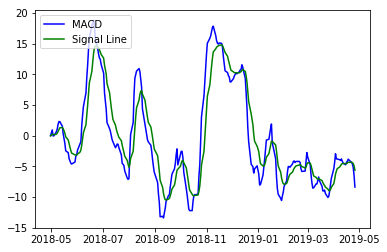

In [23]:
exp_12 = df.y.ewm(span=12, adjust=False).mean()
exp_26 = df.y.ewm(span=26, adjust=False).mean()
macd = exp_12  - exp_26
exp3 = macd.ewm(span=9, adjust=False).mean()
plt.plot(df.ds, macd, label='MACD', color = 'blue')
plt.plot(df.ds, exp3, label='Signal Line', color='green')
plt.legend(loc='upper left')
plt.show()

# Original Post 
##### - http://www.andrewshamlet.net/2017/06/10/python-tutorial-rsi/



In [0]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline



In [0]:
def RSI(series, period):
   delta = series.diff().dropna()
   u = delta * 0
   d = u.copy()
   u[delta > 0] = delta[delta > 0]
   d[delta < 0] = -delta[delta < 0]
   u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
   u = u.drop(u.index[:(period-1)])
   d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
   d = d.drop(d.index[:(period-1)])

   rs = pd.Series.ewm(d, span=period-1, adjust=False).mean() / pd.Series.ewm(u, span=period-1, adjust=False).mean()
   return 100 / (1 + rs)
   #  I am not sure about the above computations
   #return 100 - 100 / (1 + rs)

In [82]:
df['RSI'] = RSI(df['y'], 14)
df.tail()

,ds,y,RSI
245,2019-04-22,262.75,35.811592
246,2019-04-23,263.90,38.104901
247,2019-04-24,258.66,32.022896
248,2019-04-25,247.63,23.005389
249,2019-04-26,235.14,16.767601


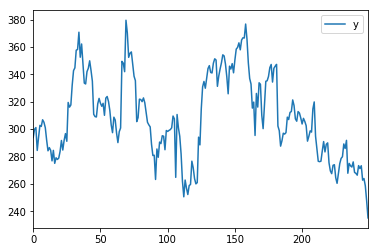

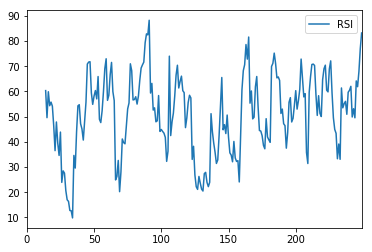

In [76]:
df.plot(y=['y'])
df.plot(y=['RSI'])

# Bollinger Bands
https://medium.com/python-data/setting-up-a-bollinger-band-with-python-28941e2fa300 

I need to start implementing  Bollinger Bands

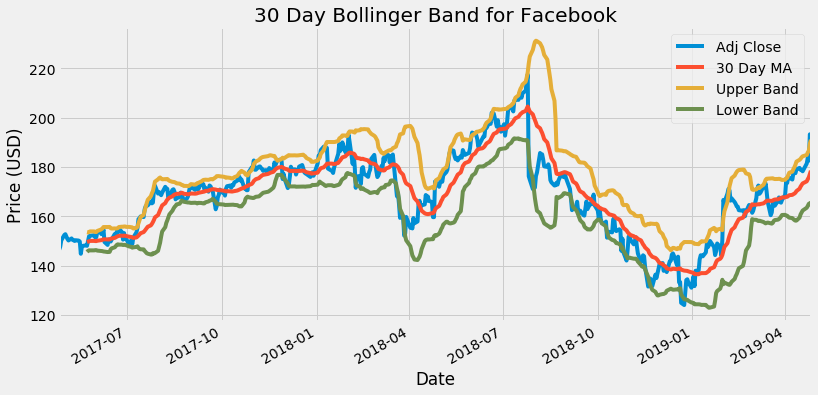

In [102]:

# import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web

# Make function for calls to Yahoo Finance
def get_adj_close(ticker, start, end):
    '''
    A function that takes ticker symbols, starting period, ending period
    as arguments and returns with a Pandas DataFrame of the Adjusted Close Prices
    for the tickers from Yahoo Finance
    '''
    start = start
    end = end
    info = web.DataReader(ticker, data_source='yahoo', start=start, end=end)['Adj Close']
    return pd.DataFrame(info)

# Get Adjusted Closing Prices for Facebook, Tesla and Amazon between 2016-2017
fb = get_adj_close('fb', '26/04/2017', '26/04/2019')
tesla = get_adj_close('tsla', '26/04/2017', '26/04/2019')
amazon = get_adj_close('amzn', '26/04/2017', '26/04/2019')

# Calculate 30 Day Moving Average, Std Deviation, Upper Band and Lower Band
for item in (fb, tesla, amazon):
    item['30 Day MA'] = item['Adj Close'].rolling(window=20).mean()
    item['30 Day STD'] = item['Adj Close'].rolling(window=20).std()
    item['Upper Band'] = item['30 Day MA'] + (item['30 Day STD'] * 2)
    item['Lower Band'] = item['30 Day MA'] - (item['30 Day STD'] * 2)

# Simple 30 Day Bollinger Band for Facebook (2016-2017)
fb[['Adj Close', '30 Day MA', 'Upper Band', 'Lower Band']].plot(figsize=(12,6))
plt.title('30 Day Bollinger Band for Facebook')
plt.ylabel('Price (USD)')
plt.show();

In [0]:
def plot_bollinger_band (stock_df, stock_name):
  # set style, empty figure and axes
  plt.style.use('fivethirtyeight')
  fig = plt.figure(figsize=(12,6))
  ax = fig.add_subplot(111)

  # Get index values for the X axis for facebook DataFrame
  x_axis = stock_df.index.get_level_values(0)

  # Plot shaded 21 Day Bollinger Band for Facebook
  ax.fill_between(x_axis, stock_df['Upper Band'], stock_df['Lower Band'], color='grey')

  # Plot Adjust Closing Price and Moving Averages
  ax.plot(x_axis, stock_df['Adj Close'], color='blue', lw=2)
  ax.plot(x_axis, stock_df['30 Day MA'], color='black', lw=2)

  # Set Title & Show the Image
  title = '30 Day Bollinger Band : '  + stock_name
  ax.set_title(title)
  ax.set_xlabel('Date (Year/Month)')
  ax.set_ylabel('Price(USD)')
  ax.legend()
  plt.show();

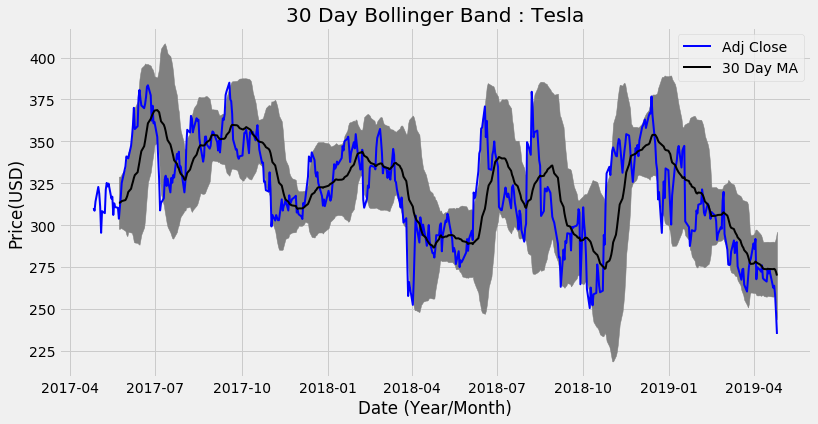

In [104]:
plot_bollinger_band (tesla, 'Tesla')

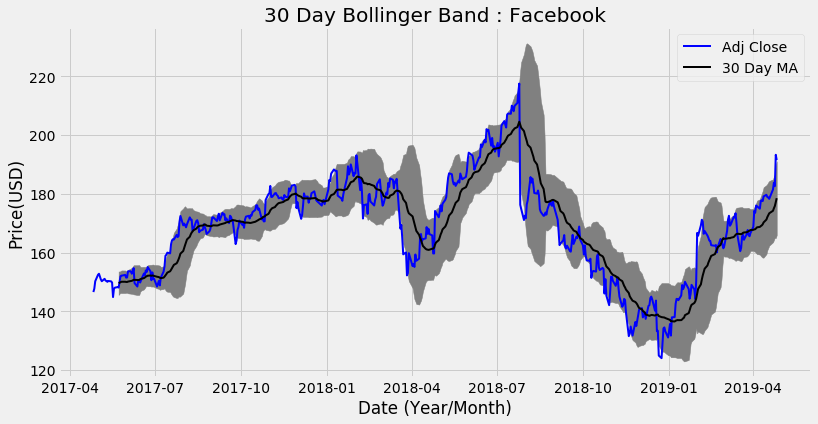

In [105]:
plot_bollinger_band (fb, 'Facebook')

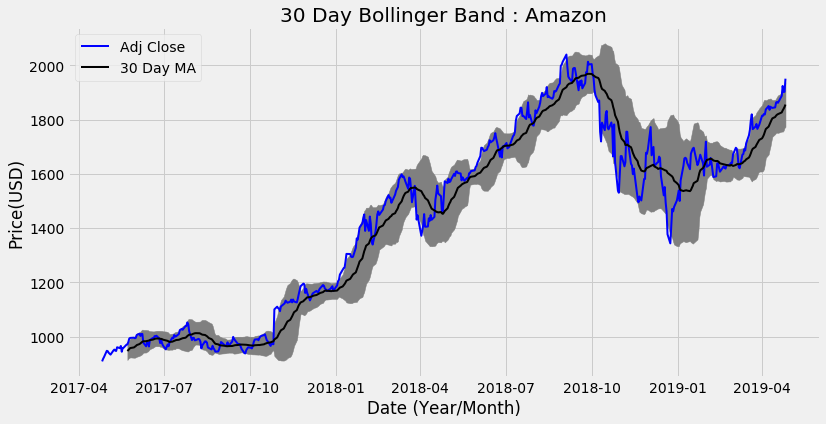

In [106]:
plot_bollinger_band (amazon, 'Amazon')

In [0]:
# Need to get all examples working
# https://github.com/PyDataBlog/Python-for-Data-Science